# Ratik Khanna

## TSF GRIP

### Prediction using Supervised ML

#### 1) Importing libraries and understanding dataset

In [24]:
# importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [25]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [26]:
# basics of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [27]:
# Checking Important Parameters
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### 2) Visualising Dataset (EDA)

In [28]:
# importing plotly library
import plotly.express as px
import pandas as pd

In [29]:
# Plotting the distribution of scores
fig = px.scatter(df, x="Hours", y="Scores",
                 title="Hours vs Percentage")

fig.show()

#### 3) Model Building

In [30]:
# Dividing the data into "attributes" (inputs) and "labels" (outputs).
X = df.Hours
y = df.Scores

In [31]:
# Spliting in train data and test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [32]:
# importing regression library and training the train dataset
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(np.array(X_train).reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


In [33]:
# importing plotly library
import plotly.graph_objects as go

In [34]:
# Plotting the regression line
x_range = np.linspace(X.min(), X.max(), 100)
y_range = regressor.predict(x_range.reshape(-1, 1))


fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

#### 4) Making Predictions

In [35]:
# Testing data - In Hours
print(X_test) 

# Predicting the scores
y_pred = regressor.predict(np.array(X_test).reshape(-1,1)) 

5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
Name: Hours, dtype: float64


In [36]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [37]:
# Predicted score if a student studies for 9.25 hrs/day
h = [[9.25]]
own_pred = regressor.predict(h)
print("No of Hours = {}".format(h))
print("Predicted Score = {}".format(own_pred))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


#### 5) Evaluating the model

In [38]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [39]:
# calculating R2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9454906892105356

#### 6) Regression Model Assumptions Validation

In [40]:
import seaborn as sns

C:\Users\Ratik\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



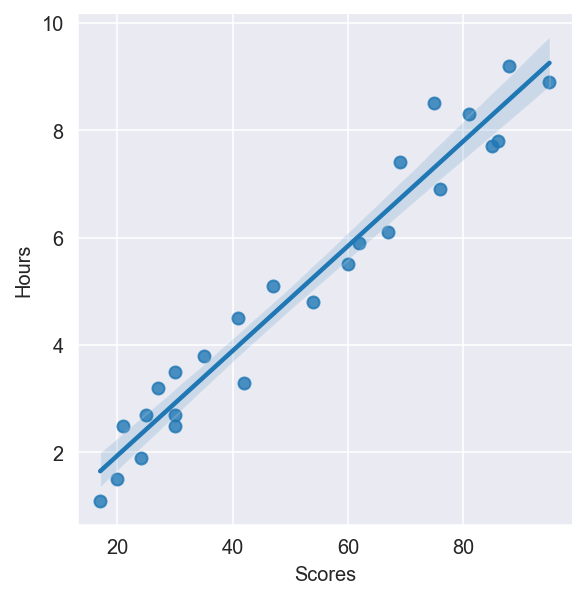

In [41]:
sns.pairplot(df, x_vars=['Scores'], y_vars='Hours',size=4, aspect=1, kind='reg',)
plt.show() 

According to this assumption there is linear relationship between the features and target. Linear regression captures only linear relationship. This can be validated by plotting a scatter plot between the features and the target. So below plot show that there is a linear relationship between ‘cnt’ and independent variables

In [42]:
import statsmodels.api as sm  

lm = sm.OLS(y_train,X_train).fit()
y_train_cmt = lm.predict(X_train)

In [43]:
y_train_cmt

22    38.855215
17    19.427607
24    79.755441
23    70.552890
14    11.247562
1     52.147788
10    78.732935
13    33.742686
8     84.867969
6     94.070520
18    62.372845
4     35.787698
9     27.607653
7     56.237811
20    27.607653
3     86.912980
0     25.562641
21    49.080271
15    91.003003
12    46.012754
dtype: float64

Text(0.5, 0, 'Errors')

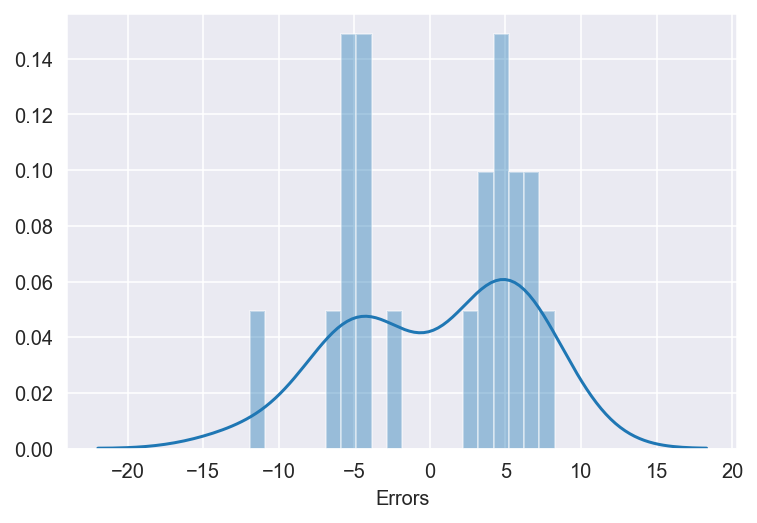

In [44]:
fig = plt.figure()
sns.distplot((y_train-y_train_cmt),bins=20)
plt.xlabel("Errors")

The random errors follow a normal distribution. From the plot given below, we can conclude that all error terms are almost normally distributed. Hence, it satisfies the assumption.


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  11.483024
p-value                              NaN
f-value                        25.616773
f p-value                       0.000069

 Goldfeld-Quandt test ----
                value
F statistic  0.951569
p-value      0.528868

 Residuals plots ----


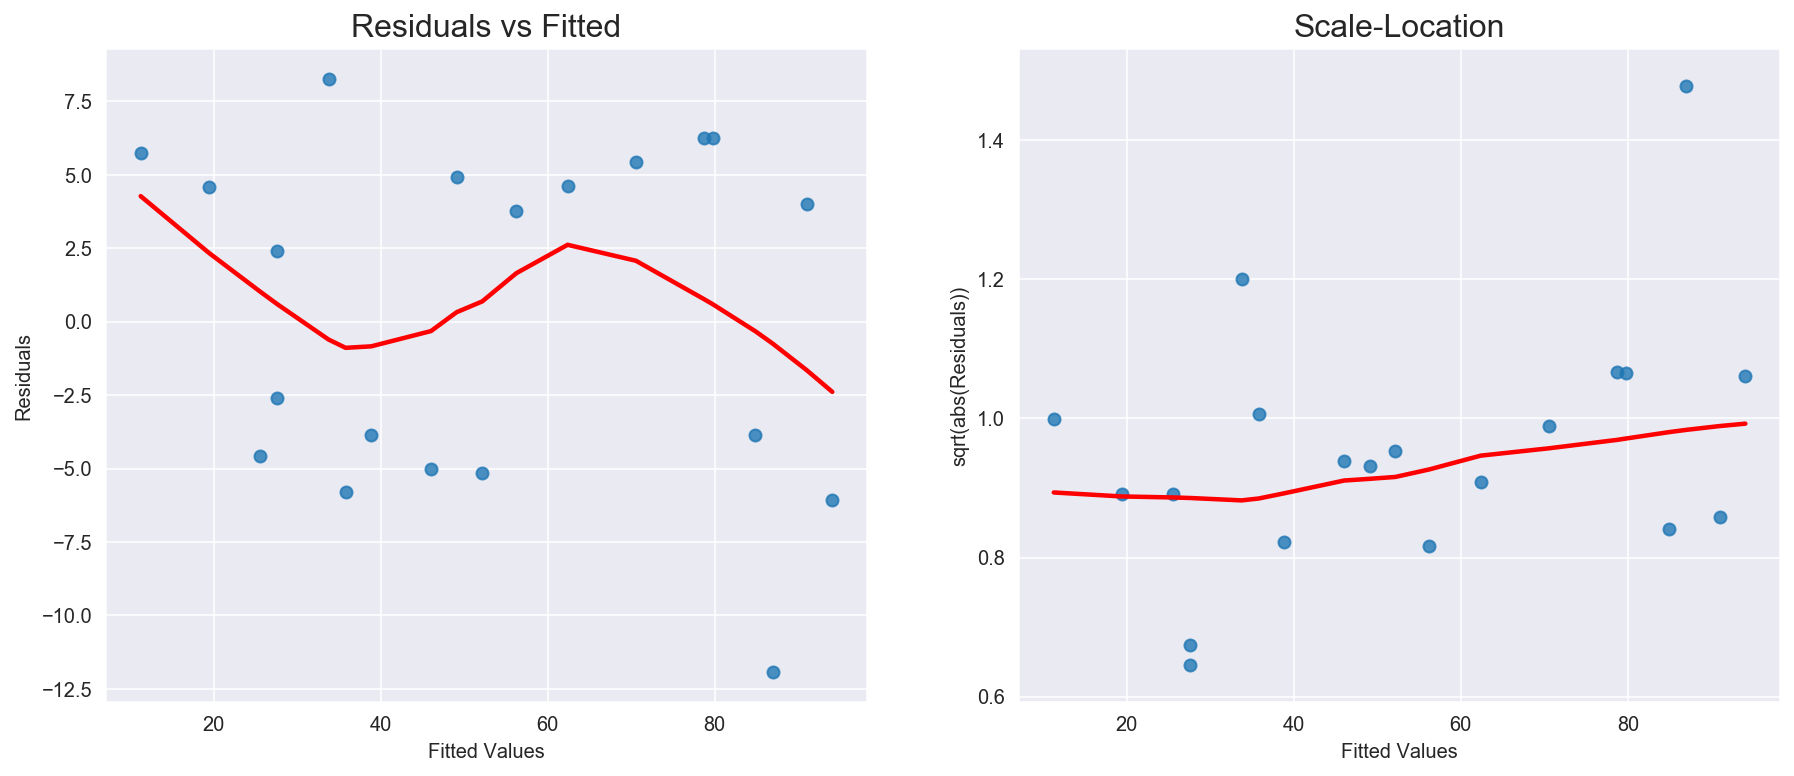

In [45]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 6.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lm)

This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.

In the below graph we can see that error terms are not forming any pattern. If heteroscedasticity was there, the error terms in below graph would make a funnel or v shape. Thus, it satisfies the assumption.